In [146]:
import numpy as np
import matplotlib.pyplot as plt

#XOR
X, Y = [], []
for i in range(100):

    x1, x2 = np.random.uniform(0,1,size=2)

    if x1 >.5 and x2 > .5: y=1
    elif x1 < .5 and x2 < .5: y=1
    else: y=0

    X.append([x1,x2])
    Y.append(y)

#Radial
X, Y = [], []
for i in range(100):

    x1, x2 = np.random.uniform(-1,1,size=2)

    if np.linalg.norm(np.array([x1,x2])) < 0.5: y=1
    else: y=0

    X.append([x1,x2])
    Y.append(y)

plt.scatter([X[i][0] for i in range(100) if Y[i]==1],
            [X[i][1] for i in range(100) if Y[i]==1],
            color='blue')

plt.scatter([X[i][0] for i in range(100) if Y[i]==0],
            [X[i][1] for i in range(100) if Y[i]==0],
            color='red')
plt.show()

X = np.array(X).T

# KPCA
$X \in \mathbb R^{D \times N}$

$$ K(x,y) = (x^T y)^2 $$

$K \in \mathbb R^{N \times N}$ where $N < M$

In [147]:
## compute kernal
N = 10
d = 2

K = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        if i > j: continue
        # polynomial
#         print(X[:,i])
        K[i,j] = X[:,i].dot(X[:,j])
        K[j,i] = K[i,j]

In [148]:
K[np.isnan(K)] = 0;
K[np.isinf(K)] = 0;
[L, V] = np.linalg.eigh(K)
L = np.flip( L[-d:] , axis=0)
V = np.flip( V[:, -d:] , axis=1)

invSqrtL = np.diag(1. / np.sqrt(L))
mapped = invSqrtL.dot(V.transpose()).dot(K)

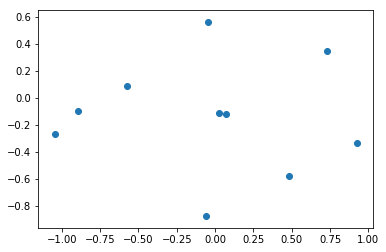

In [149]:
plt.scatter(mapped[0,:], mapped[1,:])
plt.show()